# Python Web crawler of IMDB data- Part I

## Demo using IMDB Top 250-rated films data


The following code will take data on various 
variables (e.g., IMDB ratings, nunber of IMDB votes/ratings, genre). Instead of merely downloading a CSV fileand then uploading to Python, the following code will take the data directly from the IMDB website. 

From there, the data will be passed into Pandas as a dataframe, and some scatter plots, including a 3D plot, will be implemented to explore the data and examine correlations between
some of the variables. 

One question that will be examined is: among the top 250 rated films,
do films with longer duration/lengths have the highest ratings? For example, anecdotally some of the top-250 films are much longer than 2 hours in length, such as Lord of the Rings: the Return of the King, Schindler's List, and The Godfather (1972) as well as the Godfather: Part II. 

Also, how does film length and IMDB ratings compare by films with dfferent genres: i.e., is this correlation different for films with different genres?

In [5]:
#import requests library
import requests

In [10]:
#have Python make request to access the IMDB URL that will be used for webscraping
req = requests.get('https://www.imdb.com/search/title?groups=top_250&count=250')


#import bs4 library for parsing on the data from the site's html code
from bs4 import BeautifulSoup

#Define a Beautifulsoup object, which will load the HTML data into Python
soup=BeautifulSoup(req.text, 'html.parser')

#Prints first 1000 characters of the website HTML code
print(soup.text[0:1000])








var IMDbTimer={starttime: new Date().getTime(),pt:'java'};

    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }

(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
IMDb: IMDb "Top 250"
(Sorted by Popularity Ascending) - IMDb
(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);

    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }


    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }




    if (typeof uet == 'function') {
      uet("bb", "LoadIcons", {wb: 1});
    }

(function(t){ (t.events = t.events || {})["csm_head_pre_icon"] = new Date().getTime(); })(IMDbTimer);









(function(t){ (t.events = t.events || {})["csm_head_post_icon"] = new Date().getTime(); })(IMDbTimer);

    if (typeof uet == 'function') {
      uet("be", "LoadIcons", {wb: 1});
    }


    if (typeof uex == 'function') 

In [12]:
'''Create a for loop to iterate over each of the 250 films' data contained within the film_html object.
Start by creating empty lists, which will contain the data for each of the variables:'''

#Empty lists to contain the data for each variable
year_released = []
names = []
genres = []
lengths = []
imdb_ratings = []
n_votes = []
metascores=[]

#Extract data for each of the 250 films contained within the HTMl object/container
for film in film_html:
    #only extract data from the HTML code if metascore data are available for the given film
    if film.find('div', class_ = 'ratings-metascore') is not None:
        
        #iterate and extract data for the year the film was released
        y = film.h3.find('span', class_ = 'lister-item-year').text
        #append these data to the year_released list
        year_released.append(y)

        #iterate on the film names
        n = film.h3.a.text
        names.append(n)

        #iterate on genres
        g = film.find('span', class_ = 'genre').text
        #assign to g as a slice to get only the name of genre (i.e., delete first 2 characters)
        g = g[1:]
        #Multiple genres are listed for some films, with commas in between 
        #Thus, split the genres by comma, and then only keep the first element before the first comma
        g = g.split(',')[0]
        #Before appending to genres list, delete any empty space trailing after the actual genre name
        g = g.strip()
        #Having done the needed data cleaning, append the data to the genres list
        genres.append(g)

        #itereate on film lengths
        l = film.find('span', class_='runtime').text
        #slice the data to keep only the characters that actually contain the numeric data
        l = l[:-3]
        #convert the film lengths data from string to integer
        l2 = int(l)
        #append the data to the lengths list
        lengths.append(l2)

        #iterate on IMDB ratings
        i = float(film.strong.text)
        imdb_ratings.append(i)

        #number of IMDB votes
        v = film.find('span', attrs = {'name':'nv'})['data-value']
        n_votes.append(int(v))

        # Scrape the Metascore
        m_score = film.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))



In [13]:
#Sanity check to ensure the names list contains only about 250 or fewer elements: i.e., 1 for each of the top-50 rated films
len(names)
#Notice there are only 205, but this is fine since apparently 45 of the films have no Metascore rating

205

In [14]:
#Visually inspect the lengths list to the list only contains the movie length data
lengths

[134,
 117,
 130,
 149,
 175,
 152,
 142,
 169,
 154,
 112,
 178,
 130,
 115,
 149,
 148,
 180,
 121,
 115,
 110,
 165,
 120,
 107,
 88,
 136,
 164,
 151,
 169,
 91,
 117,
 195,
 153,
 146,
 201,
 118,
 118,
 118,
 137,
 142,
 155,
 105,
 130,
 127,
 98,
 122,
 178,
 139,
 127,
 147,
 153,
 132,
 113,
 170,
 146,
 178,
 120,
 99,
 98,
 121,
 116,
 136,
 117,
 139,
 127,
 126,
 106,
 122,
 140,
 179,
 129,
 189,
 202,
 102,
 140,
 106,
 138,
 170,
 114,
 119,
 146,
 108,
 100,
 133,
 116,
 98,
 120,
 96,
 102,
 137,
 149,
 116,
 150,
 93,
 125,
 95,
 134,
 109,
 130,
 113,
 126,
 111,
 99,
 141,
 89,
 103,
 132,
 106,
 116,
 137,
 81,
 158,
 135,
 107,
 178,
 109,
 107,
 238,
 148,
 124,
 103,
 144,
 165,
 128,
 102,
 183,
 102,
 130,
 124,
 170,
 216,
 137,
 96,
 115,
 116,
 122,
 138,
 131,
 92,
 160,
 120,
 132,
 95,
 156,
 130,
 94,
 207,
 98,
 101,
 129,
 119,
 130,
 123,
 131,
 112,
 128,
 149,
 129,
 122,
 119,
 129,
 110,
 121,
 101,
 129,
 212,
 134,
 136,
 132,
 172,
 98,
 86,

In [15]:
#inspect the genres list
genres
#Notice that implementing the 3 methods (i.e., split(), strip(), and slicing) has eliminated all white space and retained only the main genre for each film

['Biography',
 'Animation',
 'Biography',
 'Action',
 'Crime',
 'Action',
 'Drama',
 'Adventure',
 'Crime',
 'Biography',
 'Adventure',
 'Adventure',
 'Comedy',
 'Crime',
 'Action',
 'Biography',
 'Action',
 'Action',
 'Crime',
 'Drama',
 'Action',
 'Drama',
 'Animation',
 'Action',
 'Action',
 'Crime',
 'Drama',
 'Adventure',
 'Comedy',
 'Biography',
 'Adventure',
 'Crime',
 'Adventure',
 'Drama',
 'Drama',
 'Crime',
 'Action',
 'Drama',
 'Action',
 'Animation',
 'Drama',
 'Adventure',
 'Adventure',
 'Crime',
 'Biography',
 'Drama',
 'Crime',
 'Drama',
 'Crime',
 'Action',
 'Drama',
 'Crime',
 'Drama',
 'Western',
 'Drama',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Crime',
 'Sci-Fi',
 'Biography',
 'Action',
 'Drama',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Crime',
 'Crime',
 'Crime',
 'Drama',
 'Drama',
 'Crime',
 'Mystery',
 'Crime',
 'Crime',
 'Drama',
 'Drama',
 'Drama',
 'Animation',
 'Drama',
 'Horror',
 'Crime',
 'Action',
 'Drama',
 'Comedy',
 'Action',
 'A

In [16]:
#show the metascores list to ensure it's in integer form, and not still a string
metascores 

[49,
 87,
 70,
 68,
 100,
 84,
 80,
 74,
 94,
 57,
 92,
 87,
 88,
 79,
 74,
 75,
 76,
 85,
 64,
 81,
 90,
 64,
 83,
 73,
 78,
 85,
 91,
 93,
 71,
 93,
 69,
 89,
 94,
 86,
 98,
 85,
 77,
 82,
 67,
 81,
 66,
 68,
 77,
 91,
 68,
 66,
 65,
 94,
 74,
 72,
 88,
 65,
 63,
 90,
 70,
 88,
 74,
 90,
 87,
 80,
 89,
 71,
 65,
 70,
 88,
 86,
 70,
 87,
 93,
 61,
 90,
 68,
 71,
 77,
 63,
 76,
 94,
 62,
 62,
 89,
 90,
 80,
 83,
 85,
 74,
 96,
 55,
 75,
 82,
 76,
 85,
 83,
 96,
 94,
 96,
 97,
 79,
 80,
 91,
 69,
 79,
 75,
 75,
 90,
 62,
 79,
 59,
 84,
 95,
 93,
 72,
 66,
 73,
 57,
 84,
 97,
 73,
 82,
 92,
 84,
 80,
 79,
 100,
 86,
 100,
 85,
 87,
 67,
 100,
 89,
 88,
 77,
 72,
 69,
 90,
 58,
 78,
 93,
 92,
 86,
 96,
 82,
 89,
 75,
 98,
 95,
 72,
 89,
 100,
 92,
 75,
 80,
 100,
 100,
 86,
 87,
 77,
 80,
 80,
 66,
 97,
 77,
 80,
 90,
 76,
 98,
 74,
 87,
 85,
 86,
 98,
 99,
 79,
 80,
 77,
 95,
 79,
 88,
 84,
 82,
 90,
 89,
 83,
 91,
 97,
 100,
 87,
 78,
 98,
 96,
 86,
 96,
 95,
 78,
 96,
 100,
 77,
 75,
 

In [17]:
year_released

['(2018)',
 '(2018)',
 '(2018)',
 '(2018)',
 '(1972)',
 '(2008)',
 '(1994)',
 '(2014)',
 '(1994)',
 '(2011)',
 '(2001)',
 '(2011)',
 '(2017)',
 '(2014)',
 '(2010)',
 '(2013)',
 '(2014)',
 '(1981)',
 '(1994)',
 '(2012)',
 '(2015)',
 '(1999)',
 '(1994)',
 '(1999)',
 '(2012)',
 '(2006)',
 '(1998)',
 '(1975)',
 '(1998)',
 '(1993)',
 '(2009)',
 '(1990)',
 '(2003)',
 '(I) (2015)',
 '(2006)',
 '(1991)',
 '(2017)',
 '(1994)',
 '(2000)',
 '(I) (2017)',
 '(2006)',
 '(1993)',
 '(1987)',
 '(2007)',
 '(1995)',
 '(1999)',
 '(1995)',
 '(1979)',
 '(2013)',
 '(1988)',
 '(2001)',
 '(1983)',
 '(1980)',
 '(1966)',
 '(1976)',
 '(2014)',
 '(2010)',
 '(1977)',
 '(1985)',
 '(1971)',
 '(1982)',
 '(2016)',
 '(1989)',
 '(1997)',
 '(2014)',
 '(1999)',
 '(2005)',
 '(2002)',
 '(I) (2015)',
 '(1999)',
 '(1974)',
 '(2000)',
 '(2011)',
 '(1995)',
 '(2010)',
 '(1995)',
 '(1976)',
 '(1998)',
 '(2011)',
 '(2004)',
 '(2003)',
 '(1975)',
 '(1979)',
 '(1996)',
 '(2003)',
 '(1957)',
 '(2000)',
 '(1991)',
 '(1968)',
 '(1987)'

In [18]:
lengths

[134,
 117,
 130,
 149,
 175,
 152,
 142,
 169,
 154,
 112,
 178,
 130,
 115,
 149,
 148,
 180,
 121,
 115,
 110,
 165,
 120,
 107,
 88,
 136,
 164,
 151,
 169,
 91,
 117,
 195,
 153,
 146,
 201,
 118,
 118,
 118,
 137,
 142,
 155,
 105,
 130,
 127,
 98,
 122,
 178,
 139,
 127,
 147,
 153,
 132,
 113,
 170,
 146,
 178,
 120,
 99,
 98,
 121,
 116,
 136,
 117,
 139,
 127,
 126,
 106,
 122,
 140,
 179,
 129,
 189,
 202,
 102,
 140,
 106,
 138,
 170,
 114,
 119,
 146,
 108,
 100,
 133,
 116,
 98,
 120,
 96,
 102,
 137,
 149,
 116,
 150,
 93,
 125,
 95,
 134,
 109,
 130,
 113,
 126,
 111,
 99,
 141,
 89,
 103,
 132,
 106,
 116,
 137,
 81,
 158,
 135,
 107,
 178,
 109,
 107,
 238,
 148,
 124,
 103,
 144,
 165,
 128,
 102,
 183,
 102,
 130,
 124,
 170,
 216,
 137,
 96,
 115,
 116,
 122,
 138,
 131,
 92,
 160,
 120,
 132,
 95,
 156,
 130,
 94,
 207,
 98,
 101,
 129,
 119,
 130,
 123,
 131,
 112,
 128,
 149,
 129,
 122,
 119,
 129,
 110,
 121,
 101,
 129,
 212,
 134,
 136,
 132,
 172,
 98,
 86,

In [20]:
#Import data analysis libraries to be able to merge the various lists into a dataframe
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


In [21]:
''''Import the IMDB web data accumulated in the various lists
into a Pandas Dataframe by assigning each list to a column
via a dictionary:
'''
imdb_data = pd.DataFrame({'name':names,
                         'year':year_released,
                         'genre':genres,
                         'length':lengths,
                          'metascores': metascores,
                         'imdb_rating':imdb_ratings,
                         'n_votes':n_votes})

#As sanity check, show first 10 rows of the imdb_data dataframe's data
imdb_data.head(10)

,name,year,genre,length,metascores,imdb_rating,n_votes
0,Bohemian Rhapsody,(2018),Biography,134,49,8.3,193062
1,Spider-Man: Into the Spider-Verse,(2018),Animation,117,87,8.7,83464
2,Green Book,(2018),Biography,130,70,8.3,27459
3,Avengers: Infinity War,(2018),Action,149,68,8.5,571830
4,The Godfather,(1972),Crime,175,100,9.2,1401492
5,The Dark Knight,(2008),Action,152,84,9.0,2010893
6,The Shawshank Redemption,(1994),Drama,142,80,9.3,2043477
7,Interstellar,(2014),Adventure,169,74,8.6,1251677
8,Pulp Fiction,(1994),Crime,154,94,8.9,1596607
9,The Intouchables,(2011),Biography,112,57,8.5,654469


In [101]:
#Show the type of data that each column/variable is
imdb_data.dtypes

#Notice that metascores variable was actually imported as an object data type (i.e., Pandas' version of a string)
#This is a problem since metascores will need to be considered as an integer or float in order to perform statistical analysis or implement plots using its data

name            object
year            object
genre           object
length           int64
metascores       int64
imdb_rating    float64
n_votes          int64
dtype: object

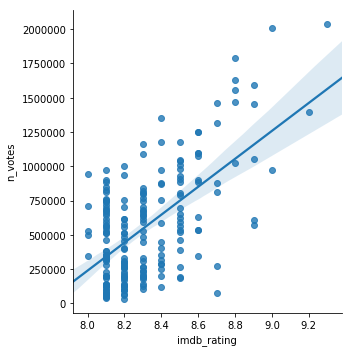

In [102]:
#Show a scatter plot visualizing the correlation between imdb_ratings and the number of IMDB votes
sns.lmplot('imdb_rating', 'n_votes', imdb_data)

Notice that there is a moderately high degree of positive correlation between the number of IMDB ratings and the IMDB rating itself. This suggests that, among the highest-rated films, the highest-rated films are more popular, at least among IMDB users. However, there are several notable outliers that may or may not be significantly affecting this apparent correlation (which, without more in-depth analysis, very well may not be statistically signficant or high in magnitude.

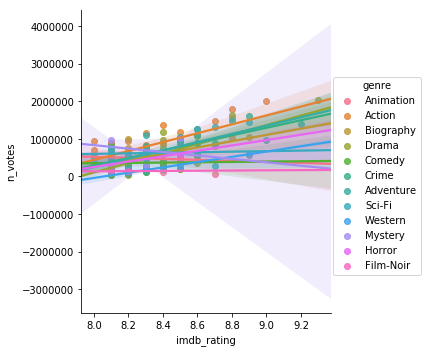

In [53]:
#Now show the correlation between the same variables, but use genre as a hue.
#I.e., compare the correlations by genre
sns.lmplot('imdb_rating', 'n_votes', imdb_data, hue='genre')

Notice that the correlation between the number of votes and IMDB ratings now changes rather dramatically. For example, Action, Adventure, Drama, and Crime films all have positive correlations (Action in particular), indicating that a higher number of votes tends to be associated with a moderately higher IMDB_rating. 

By contrast, genres such as Westerns and Film-noir show essentially no correlation with the number of IMDB votes. Perhaps these 2 genres are, on average, less popular than the other genres represented in the top-rated IMDB films. However, more data would clearly be needed to test this claim. For example, a time series of U.S. box office data might help shine light on whether these genres are less or more popular than the genres that appear to have IMDB votes. Another complication is that lower-rated films on the IMDB site also may not show the same relaitonship between the number of IMDB votes and the IMDB rating, including when the correlation is compared between genres.

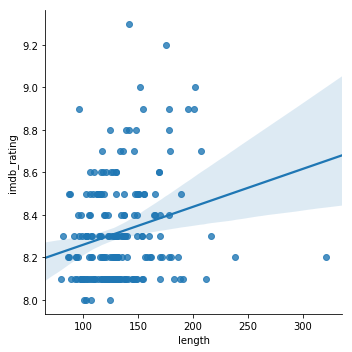

In [22]:
#show correlation between IMDB ratings and the film lengths
sns.lmplot('length', 'imdb_rating', imdb_data)

Again, there is a moderate amount of positive correlation (but less than the correlation between the number of votes and the IMDB ratings). 

This correlation suggesting that, among the top 200+ films, the longer films tend to have somewhat higher ratings, but the association is fairly and there appear to be more notable outliers than in the previous plot.

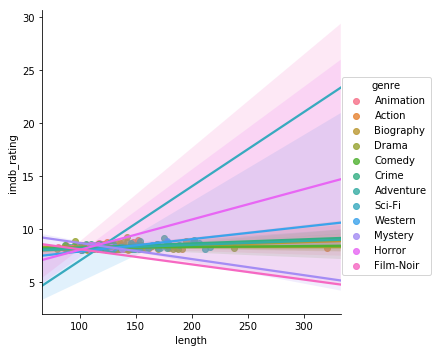

In [104]:
#Plot the same 2 variables, but now compare the correlations by genre.
sns.lmplot('length', 'imdb_rating', imdb_data, hue='genre')

Unlike for correlations between the number of votes and IMDB ratings compared by genre, the correlations between film length and IMDB ratings are less similar by genre. 
Adventure, Drama, and Western films, in particular, tend to have a stronger positive correlaiton between movie length and IMDB rating.

By contrast, Horror and Mystery films show a moderate negative correlation with IMDB ratings, suggesting that, for these genres, shorter films are perceived to of a higher quality. The very few number of these films in the sample, however, severely limits the accuracy and precision of this analysis.

In [56]:
#Now, implement a 3D plot 

#Start by initializing the figure object
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [57]:
#Set a 3D projection onto the plot so that the plot can be implemented in 3 dimensions
ax = fig.add_subplot(111, projection = '3d')

#Assign the data that will be used for the scatterplot: i.e., for the x, y, and z axes
#Also, set the color to 'c', i.e., cyan
ax.scatter(imdb_data['length'],imdb_data['imdb_rating'], imdb_data['n_votes'], c='c', s=60)

#Set axis labels/titles
ax.set_xlabel('length')
ax.set_ylabel('imdb_rating')
ax.set_zlabel('n_votes')

#Set title of figure/plto
ax.set_title('IMDB ratings, film length, and number of IMDB votes')

plt.show()

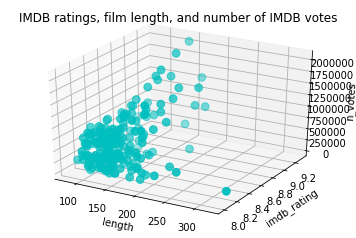

In [58]:
#Show 3D plot
fig

Notice there is a moderate degree of correlation between IMDB ratings and the number of IMDB votes, but movie length
has relativelylittle association with either of the variables. I.e., longer films tend to have a higher number of votes and also tend to have higher IMDB ratings. 

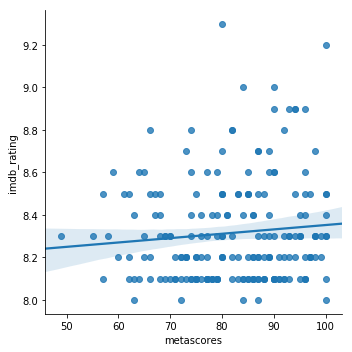

In [81]:
#Scatter plot comparing metascores and IMDB ratings
sns.lmplot('metascores', 'imdb_rating', imdb_data)

Notice that there is essentially no correlaiton between metascore ratings and IMDB ratings. The number of IMDB ratings likely far exceeds the number of metascore ratings, but metascore ratings represent a weighted average of movie critic ratings, whereas IMDB ratings can be voted on by the general movie-going public.

Clearly, 205 films that are highly-rated on IMDB are not sufficient to make a strong claim on whether movie critics' opinions/views are poorly represented among the general public, but the data do show a bit of disconnect between movie critics' ratings compared with the ratings of the overall public. 

For exampe, notice that quite a few films that had good (albeit, not quite the highest) IMDB ratings ranging from 8.0 to 8.6 nevertheless had low metascore ratings of 50 to 64.

On the other end as well, there are some notable "misses" on the movie critic side: a few films have aa very high metascore rating of 95 or higher, and even a few achieved the maximum metacore rating of 100. For all but 1 of these films, these failed to reach the highest echelon of IMDB ratings.